In [2]:
import gc
import xarray as xr
import rioxarray
import numpy as np

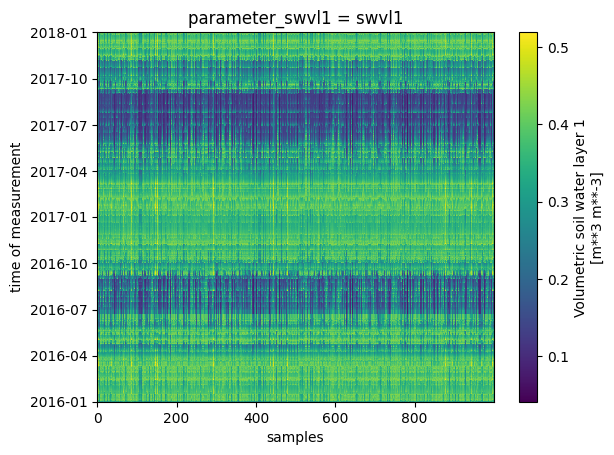

In [10]:
t = xr.open_zarr("/tmp/sampled.zarr")

In [3]:
tile = xr.open_zarr("/shared/italy/measurements/V1M0R1/EQUI7_EU500M/E048N006T6/SM-EST-IN_20160101T050131_20171231T171119_VV_SIG0-R-CRRL_E048N006T6_EU500M_V1M0R1__TUWIEN.zarr")
tile

<xarray.Dataset>
Dimensions:                  (time_LAI300: 147, parameter_LAI300: 1, y: 1200,
                              x: 1200, orbit_PLIA-TAG-MEAN: 12,
                              parameter_PLIA-TAG-MEAN: 1,
                              time_SIG0-R-CRRL: 1140, parameter_SIG0-R-CRRL: 1,
                              parameter_swvl1: 1, time_swvl1: 1142)
Coordinates:
  * orbit_PLIA-TAG-MEAN      (orbit_PLIA-TAG-MEAN) <U4 'A015' 'A044' ... 'D168'
    orbit_SIG0-R-CRRL        (time_SIG0-R-CRRL) <U4 dask.array<chunksize=(1140,), meta=np.ndarray>
  * parameter_LAI300         (parameter_LAI300) int64 1
  * parameter_PLIA-TAG-MEAN  (parameter_PLIA-TAG-MEAN) int64 1
  * parameter_SIG0-R-CRRL    (parameter_SIG0-R-CRRL) int64 1
  * parameter_swvl1          (parameter_swvl1) <U5 'swvl1'
  * time_LAI300              (time_LAI300) datetime64[ns] 2015-12-31 ... 2020...
  * time_SIG0-R-CRRL         (time_SIG0-R-CRRL) datetime64[ns] 2016-01-01T05:...
  * time_swvl1               (time_swvl1) datetime64[ns] 2016-01-01 ... 2018-...
  * x                        (x) float64 4.8e+06 4.801e+06 ... 5.399e+06 5.4e+06
  * y                        (y) float64 1.2e+06 1.199e+06 ... 6.002e+05
Data variables:
    LAI300                   (time_LAI300, parameter_LAI300, y, x) float32 dask.array<chunksize=(147, 1, 100, 100), meta=np.ndarray>
    PLIA-TAG-MEAN            (orbit_PLIA-TAG-MEAN, parameter_PLIA-TAG-MEAN, y, x) float32 dask.array<chunksize=(12, 1, 100, 100), meta=np.ndarray>
    SIG0-R-CRRL              (time_SIG0-R-CRRL, parameter_SIG0-R-CRRL, y, x) float32 dask.array<chunksize=(1140, 1, 100, 100), meta=np.ndarray>
    crs                      int64 ...
    spatial_ref              int64 ...
    swvl1                    (time_swvl1, parameter_swvl1, y, x) float32 dask.array<chunksize=(1142, 1, 100, 100), meta=np.ndarray>
Attributes:
    prime_variable:  SIG0-R-CRRL

In [4]:
scores = rioxarray.open_rasterio("/shared/italy/validation/V1M0R1/EQUI7_EU500M/E048N006T6/CORR-SM-swvl1_20170101T000000_20171231T235959_VV_SIG0-R-CRRL_E048N006T6_EU500M_V1M0R1__TUWIEN.tif")
scores

<xarray.DataArray (band: 1, y: 1200, x: 1200)>
[1440000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.8e+06 4.801e+06 4.801e+06 ... 5.399e+06 5.4e+06
  * y            (y) float64 1.2e+06 1.199e+06 1.199e+06 ... 6.008e+05 6.002e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [5]:
indices = np.nonzero(~np.isnan(scores[0]))
indices

<xarray.DataArray (y: 2, x: 521470)>
array([[   0,    0,    0, ..., 1199, 1199, 1199],
       [   0,    1,    2, ...,  874,  875,  876]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.8e+06 4.801e+06 4.801e+06 ... 5.399e+06 5.4e+06
  * y            (y) float64 1.2e+06 1.199e+06 1.199e+06 ... 6.008e+05 6.002e+05
    spatial_ref  int64 0

In [5]:
indices.values

array([[   0,    0,    0, ..., 1199, 1199, 1199],
       [   0,    1,    2, ...,  874,  875,  876]])

In [6]:
selection = np.arange(indices.shape[-1])
np.random.shuffle(selection)
indices_sel = indices.values[:, selection[:1000]]

In [7]:
tile_sampled = tile.isel(y=xr.DataArray(indices_sel[0], dims="samples"),
                         x=xr.DataArray(indices_sel[1], dims="samples"))
tile_sampled

<xarray.Dataset>
Dimensions:                  (time_LAI300: 147, parameter_LAI300: 1,
                              samples: 1000, orbit_PLIA-TAG-MEAN: 12,
                              parameter_PLIA-TAG-MEAN: 1,
                              time_SIG0-R-CRRL: 1140, parameter_SIG0-R-CRRL: 1,
                              parameter_swvl1: 1, time_swvl1: 1142)
Coordinates:
  * orbit_PLIA-TAG-MEAN      (orbit_PLIA-TAG-MEAN) <U4 'A015' 'A044' ... 'D168'
    orbit_SIG0-R-CRRL        (time_SIG0-R-CRRL) <U4 dask.array<chunksize=(1140,), meta=np.ndarray>
  * parameter_LAI300         (parameter_LAI300) int64 1
  * parameter_PLIA-TAG-MEAN  (parameter_PLIA-TAG-MEAN) int64 1
  * parameter_SIG0-R-CRRL    (parameter_SIG0-R-CRRL) int64 1
  * parameter_swvl1          (parameter_swvl1) <U5 'swvl1'
  * time_LAI300              (time_LAI300) datetime64[ns] 2015-12-31 ... 2020...
  * time_SIG0-R-CRRL         (time_SIG0-R-CRRL) datetime64[ns] 2016-01-01T05:...
  * time_swvl1               (time_swvl1) datetime64[ns] 2016-01-01 ... 2018-...
    x                        (samples) float64 5.305e+06 4.89e+06 ... 5.208e+06
    y                        (samples) float64 1.059e+06 9.172e+05 ... 6.482e+05
Dimensions without coordinates: samples
Data variables:
    LAI300                   (time_LAI300, parameter_LAI300, samples) float32 dask.array<chunksize=(147, 1, 1000), meta=np.ndarray>
    PLIA-TAG-MEAN            (orbit_PLIA-TAG-MEAN, parameter_PLIA-TAG-MEAN, samples) float32 dask.array<chunksize=(12, 1, 1000), meta=np.ndarray>
    SIG0-R-CRRL              (time_SIG0-R-CRRL, parameter_SIG0-R-CRRL, samples) float32 dask.array<chunksize=(1140, 1, 1000), meta=np.ndarray>
    crs                      int64 ...
    spatial_ref              int64 ...
    swvl1                    (time_swvl1, parameter_swvl1, samples) float32 dask.array<chunksize=(1142, 1, 1000), meta=np.ndarray>
Attributes:
    prime_variable:  SIG0-R-CRRL

In [12]:
tile_sampled.to_zarr("/tmp/sampled.zarr")

In [ ]:
def norm_chunks(dim, chunk):
    if dim in {'y', 'x'}:
        return 100
    return chunk

In [6]:
selected = {}
for k, v in tile.items():
    if {'y', 'x'}.issubset(v.dims):
        selected[k] = v[..., indices_sel[0], indices_sel[1]].load().chunk({d: norm_chunks(d, c) for d, c in v.chunks.items()})
        v.close()
    else:
        selected[k] = v.load()
    gc.collect()

tls = xr.Dataset(selected)
tls.attrs = tile.attrs

/home/braml/code/github/use-case-wetland-water-stress/venv/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing with an out-of-order index is generating 77 times more chunks
  value = value[(slice(None),) * axis + (subkey,)]
/home/braml/code/github/use-case-wetland-water-stress/venv/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing with an out-of-order index is generating 76 times more chunks
  value = value[(slice(None),) * axis + (subkey,)]


In [ ]:
tls.to_zarr("/tmp/sampled.zarr")